In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Data source- CEA
cons_ind_df=pd.read_csv('Data/CEA/Consumption2012-2021.csv')
cons_ind_df['Category']=cons_ind_df['Category'].str.split('-').str[0]+'-01-01'
cons_ind_df['Category']=pd.to_datetime(cons_ind_df['Category'])
cons_ind_df.columns=['Category', 'Domestic', 'Commercial', 'Industrial ',
       'Industrial (High Voltage)', 'Public Lighting', 'Traction',
       'Agriculture', 'Public Water Works', 'Miscellaneous',
       'Total Energy Sold']
sel_cols=['Category', 'Domestic', 'Commercial', 'Industrial ',
       'Industrial (High Voltage)', 'Public Lighting', 'Traction',
       'Agriculture', 'Public Water Works', 
       'Total Energy Sold']
cons_ind_df=cons_ind_df[sel_cols]
for cols in cons_ind_df.columns[1:-1]:
    cons_ind_df[cols]=round((cons_ind_df[cols]/cons_ind_df['Total Energy Sold'])*100,3)

In [51]:
cons_ind_df.head()

,Category,Domestic,Commercial,Industrial,Industrial (High Voltage),Public Lighting,Traction,Agriculture,Public Water Works,Total Energy Sold
0,2012-01-01,22.286,8.831,5.677,38.723,0.982,1.711,17.889,1.968,8.243012e+05
1,2013-01-01,22.880,8.501,5.857,38.156,0.979,1.779,17.488,2.197,8.734282e+05
2,2014-01-01,22.988,8.289,5.664,40.045,0.925,1.711,17.861,1.992,9.457367e+05
3,2017-01-01,24.349,8.345,5.970,35.743,0.861,1.552,17.736,1.858,1.123427e+06
4,2018-01-01,23.822,8.118,5.599,37.311,0.800,1.557,17.638,1.846,1.209972e+06


In [33]:
cons_ind_df.columns

Index(['Category', 'Domestic', 'Commercial', 'Industrial ',
       'Industrial (High Voltage)', 'Public Lighting', 'Traction',
       'Agriculture', 'Public Water Works', 'Miscellaneous',
       'Total Energy Sold'],
      dtype='object')

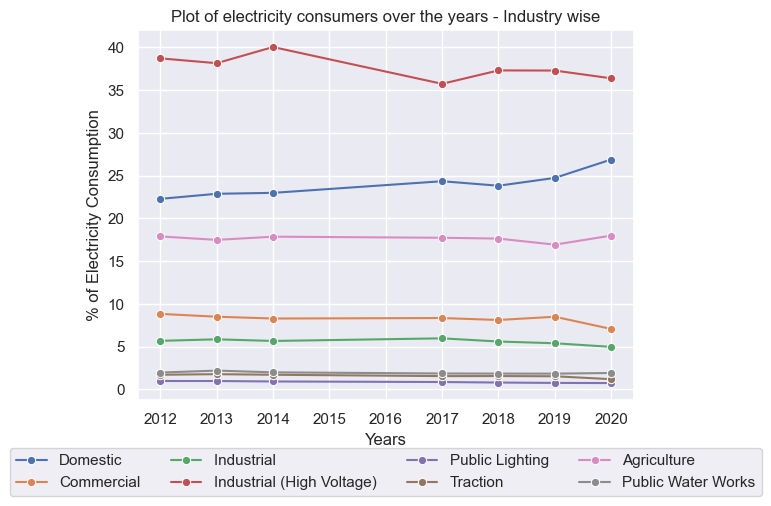

In [56]:
sns.set(style="darkgrid")
#markers_color = ['green','green','green','green','red','red','green','green']

for cols in cons_ind_df.columns[1:-1]:
    sns.lineplot(data=cons_ind_df,x=cons_ind_df['Category'].dt.year,y=cols,marker='o',label=cols)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=4)
plt.xlabel("Years")
plt.ylabel("% of Electricity Consumption")
plt.title("Plot of electricity consumers over the years - Industry wise")
plt.savefig('Data/images/Cons_Ind_wise.png',dpi=400,bbox_inches='tight')
plt.show()

In [ ]:
cons